<a href="https://colab.research.google.com/github/mirsadra/DPP-4/blob/main/t001_O31048_porphyromonas_gingivalis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# T001

## Connect to ChEMBL database

In [2]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 12.7 MB/s eta 0:00:00


In [7]:
!pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.7 MB/s eta 0:00:00


In [8]:
import math
# from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
from chembl_webresource_client.new_client import new_client
from tqdm.auto import tqdm

In [ ]:
# HERE = Path(_dh[-1])
# DATA = HERE / "data"

In [9]:
# Next, we create resource objects for API access
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity

In [10]:
type(targets_api)

chembl_webresource_client.query_set.QuerySet

In [18]:
# Get UniProt ID of the target of interest
uniprot_id = "O31048"

In [19]:
# Get target information from ChEMBL but restrict it to specified values only
targets = targets_api.get(target_components__accession=uniprot_id).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


In [20]:
# Download target data from ChEMBL
targets = pd.DataFrame.from_records(targets)
targets

,organism,pref_name,target_chembl_id,target_type
0,Porphyromonas gingivalis,Dipeptidyl peptidase IV,CHEMBL4295559,SINGLE PROTEIN
1,Porphyromonas gingivalis,Dipeptidyl peptidase IV,CHEMBL4295559,SINGLE PROTEIN


In [21]:
# After checking the entries, we select the first entry as our target of interest:
# It is a single protein and represents the Dipeptidyl peptidase IV (CHEMBL284)
target = targets.iloc[0]
target

organism            Porphyromonas gingivalis
pref_name            Dipeptidyl peptidase IV
target_chembl_id               CHEMBL4295559
target_type                   SINGLE PROTEIN
Name: 0, dtype: object

In [22]:
# Save selected ChEMBL ID.
chembl_id = target.target_chembl_id
print(f"The target ChEMBL ID is {chembl_id}")

The target ChEMBL ID is CHEMBL4295559


In [23]:
# Now, we want to query bioactivity data for the target of interest.
# Fetch bioactivity data for the target from ChEMBL¶
bioactivities = bioactivities_api.filter(
    target_chembl_id=chembl_id, type="IC50", relation="=", assay_type="B"
).only(
    "activity_id",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",
)

print(f"Length and type of bioactivities object: {len(bioactivities)}, {type(bioactivities)}")

Length and type of bioactivities object: 74, <class 'chembl_webresource_client.query_set.QuerySet'>


In [24]:
# Each entry in our bioactivity set holds the following information:
print(f"Length and type of first element: {len(bioactivities[0])}, {type(bioactivities[0])}")
bioactivities[0]

Length and type of first element: 13, <class 'dict'>


{'activity_id': 18313941,
 'assay_chembl_id': 'CHEMBL4132756',
 'assay_description': 'Inhibition of Porphyromonas gingivalis N-terminal His-tagged DPP4 expressed in Escherichia coli using Gly-Pro-p-nitroanilide as substrate',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL383705',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '29000.0',
 'target_chembl_id': 'CHEMBL4295559',
 'target_organism': 'Porphyromonas gingivalis',
 'type': 'IC50',
 'units': 'uM',
 'value': '29.0'}

In [25]:
# Download bioactivity data from ChEMBL
bioactivities_df = pd.DataFrame.from_dict(bioactivities)
print(f"DataFrame shape: {bioactivities_df.shape}")
bioactivities_df.head()

DataFrame shape: (74, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,18313941,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL383705,=,nM,29000.0,CHEMBL4295559,Porphyromonas gingivalis,IC50,uM,29.0
1,18313942,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL98408,=,nM,19000.0,CHEMBL4295559,Porphyromonas gingivalis,IC50,uM,19.0
2,18313943,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL4176189,=,nM,140.0,CHEMBL4295559,Porphyromonas gingivalis,IC50,uM,0.14
3,18313944,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL142703,=,nM,1300.0,CHEMBL4295559,Porphyromonas gingivalis,IC50,uM,1.3
4,18313945,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL1422,=,nM,18000.0,CHEMBL4295559,Porphyromonas gingivalis,IC50,uM,18.0


Note that the first two rows describe the same bioactivity entry; we will remove such artifacts later during the deduplication step. Note also that we have columns for standard_units/units and standard_values/values; in the following, we will use the standardized columns (standardization by ChEMBL), and thus, we drop the other two columns.

In [26]:
bioactivities_df["units"].unique()

array(['uM'], dtype=object)

In [ ]:
bioactivities_df.drop(["units", "value"], axis=1, inplace=True)
bioactivities_df.head()

In [29]:
# Preprocess and filter bioactivity data¶
# 1. Convert datatype of “standard_value” from “object” to “float”
bioactivities_df.dtypes

activity_id            int64
assay_chembl_id       object
assay_description     object
assay_type            object
molecule_chembl_id    object
relation              object
standard_units        object
standard_value        object
target_chembl_id      object
target_organism       object
type                  object
dtype: object

In [30]:
bioactivities_df = bioactivities_df.astype({"standard_value": "float64"})
bioactivities_df.dtypes

activity_id             int64
assay_chembl_id        object
assay_description      object
assay_type             object
molecule_chembl_id     object
relation               object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
type                   object
dtype: object

In [31]:
# 2. Delete entries with missing values
bioactivities_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (30, 11)


In [32]:
# 3. Keep only entries with “standard_unit == nM”
print(f"Units in downloaded data: {bioactivities_df['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df[bioactivities_df['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM']
Number of non-nM entries:    0


In [33]:
bioactivities_df = bioactivities_df[bioactivities_df["standard_units"] == "nM"]
print(f"Units after filtering: {bioactivities_df['standard_units'].unique()}")

Units after filtering: ['nM']


In [34]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (30, 11)


In [ ]:
# 4. Delete duplicate molecules
# bioactivities_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
# print(f"DataFrame shape: {bioactivities_df.shape}")

In [35]:
# 5. Reset “DataFrame” index
bioactivities_df.reset_index(drop=True, inplace=True)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type
0,18313941,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL383705,=,nM,29000.0,CHEMBL4295559,Porphyromonas gingivalis,IC50
1,18313942,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL98408,=,nM,19000.0,CHEMBL4295559,Porphyromonas gingivalis,IC50
2,18313943,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL4176189,=,nM,140.0,CHEMBL4295559,Porphyromonas gingivalis,IC50
3,18313944,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL142703,=,nM,1300.0,CHEMBL4295559,Porphyromonas gingivalis,IC50
4,18313945,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL1422,=,nM,18000.0,CHEMBL4295559,Porphyromonas gingivalis,IC50


In [36]:
# 6. Rename columns
bioactivities_df.rename(
    columns={"standard_value": "IC50", "standard_units": "units"}, inplace=True
)
bioactivities_df.head()

,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,units,IC50,target_chembl_id,target_organism,type
0,18313941,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL383705,=,nM,29000.0,CHEMBL4295559,Porphyromonas gingivalis,IC50
1,18313942,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL98408,=,nM,19000.0,CHEMBL4295559,Porphyromonas gingivalis,IC50
2,18313943,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL4176189,=,nM,140.0,CHEMBL4295559,Porphyromonas gingivalis,IC50
3,18313944,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL142703,=,nM,1300.0,CHEMBL4295559,Porphyromonas gingivalis,IC50
4,18313945,CHEMBL4132756,Inhibition of Porphyromonas gingivalis N-termi...,B,CHEMBL1422,=,nM,18000.0,CHEMBL4295559,Porphyromonas gingivalis,IC50


In [37]:
print(f"DataFrame shape: {bioactivities_df.shape}")

DataFrame shape: (30, 11)


## Get compound data

We have a DataFrame containing all molecules tested against human DPP-4 (with the respective measured bioactivity).  
Now, we want to get the molecular structures of the molecules that are linked to respective bioactivity ChEMBL IDs.

In [38]:
# fetch compound ChEMBL IDs and structures for the compounds linked to our filtered bioactivity data.
compounds_provider = compounds_api.filter(
    molecule_chembl_id__in=list(bioactivities_df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

In [40]:
# Download compound data from ChEMBL
# Again, we want to export the QuerySet object into a pandas.DataFrame. Given the data volume, this can take some time.
# For that reason, we will first obtain the list of records through tqdm, so we get a nice progress bar and some ETAs.
# We can then pass the list of compounds to the DataFrame.
compounds = list(tqdm(compounds_provider))

  0%|          | 0/30 [00:00<?, ?it/s]

In [41]:
compounds_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (30, 2)


In [42]:
compounds_df

,molecule_chembl_id,molecule_structures
0,CHEMBL17041,"{'canonical_smiles': 'CCC(C)C(N)C(=O)N1CCCC1',..."
1,CHEMBL16709,"{'canonical_smiles': 'CC(C)C(N)C(=O)N1CCCC1', ..."
2,CHEMBL98408,{'canonical_smiles': 'CC[C@H](C)[C@H](N)C(=O)N...
3,CHEMBL142703,{'canonical_smiles': 'N#C[C@@H]1CCCN1C(=O)CNC1...
4,CHEMBL148955,"{'canonical_smiles': 'NCCCCC(N)C(=O)N1CCSC1', ..."
5,CHEMBL383705,{'canonical_smiles': 'CC(C)[C@H](N)C(=O)N1CCCC...
6,CHEMBL1422,{'canonical_smiles': 'N[C@@H](CC(=O)N1CCn2c(nn...
7,CHEMBL459642,{'canonical_smiles': 'N[C@@H](CCCCNC(=O)OCc1cc...
8,CHEMBL461912,{'canonical_smiles': 'N#C[C@@H]1CCCN1C(=O)[C@@...
9,CHEMBL471544,{'canonical_smiles': 'N#C[C@@H]1CCCN1C(=O)[C@@...


In [43]:
# 1. Remove entries with missing molecule structure entry
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (30, 2)


In [44]:
# 2. Delete duplicate molecules
compounds_df.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (30, 2)


In [45]:
# 3. Get molecules with canonical SMILES
compounds_df.iloc[0].molecule_structures.keys()

canonical_smiles = []

for i, compounds in compounds_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

compounds_df["smiles"] = canonical_smiles
compounds_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (30, 2)


In [46]:
# Sanity check: Remove all molecules without a canonical SMILES string.
compounds_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {compounds_df.shape}")

DataFrame shape: (30, 2)


## Output (bioactivity-compound) data

In [47]:
# Summary of compound and bioactivity data
print(f"Bioactivities filtered: {bioactivities_df.shape[0]}")
bioactivities_df.columns

Bioactivities filtered: 30


Index(['activity_id', 'assay_chembl_id', 'assay_description', 'assay_type',
       'molecule_chembl_id', 'relation', 'units', 'IC50', 'target_chembl_id',
       'target_organism', 'type'],
      dtype='object')

In [48]:
print(f"Compounds filtered: {compounds_df.shape[0]}")
compounds_df.columns

Compounds filtered: 30


Index(['molecule_chembl_id', 'smiles'], dtype='object')

In [49]:
# Merge both datasets
# Merge DataFrames
output_df = pd.merge(
    bioactivities_df[["molecule_chembl_id", "IC50", "units"]],
    compounds_df,
    on="molecule_chembl_id",
)

# Reset row indices
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")

Dataset with 30 entries.


In [50]:
output_df.dtypes

molecule_chembl_id     object
IC50                  float64
units                  object
smiles                 object
dtype: object

In [51]:
output_df.head(10)

,molecule_chembl_id,IC50,units,smiles
0,CHEMBL383705,29000.0,nM,CC(C)[C@H](N)C(=O)N1CCCC1
1,CHEMBL98408,19000.0,nM,CC[C@H](C)[C@H](N)C(=O)N1CCSC1
2,CHEMBL4176189,140.0,nM,CC(C)[C@H](N)C(=O)N1CCCC1B(O)O
3,CHEMBL142703,1300.0,nM,N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2
4,CHEMBL1422,18000.0,nM,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...
5,CHEMBL459642,22000.0,nM,N[C@@H](CCCCNC(=O)OCc1ccccc1)C(=O)N1CCCC1
6,CHEMBL461912,1600.0,nM,N#C[C@@H]1CCCN1C(=O)[C@@H](N)CCCCN
7,CHEMBL471544,1500.0,nM,N#C[C@@H]1CCCN1C(=O)[C@@H](N)CCCCNC(=O)OCc1ccccc1
8,CHEMBL4167565,800.0,nM,N#C[C@@H]1C[C@H](N=[N+]=[N-])CN1C(=O)[C@@H](N)...
9,CHEMBL4168495,480.0,nM,N#C[C@@H]1C[C@H](N=[N+]=[N-])CN1C(=O)[C@@H](N)...


In [52]:
# Add pIC50 values
def convert_ic50_to_pic50(IC50_value):
    pIC50_value = 9 - math.log10(IC50_value)
    return pIC50_value

In [53]:
# Apply conversion to each row of the compounds DataFrame
output_df["pIC50"] = output_df.apply(lambda x: convert_ic50_to_pic50(x.IC50), axis=1)

In [54]:
output_df.head()

,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL383705,29000.0,nM,CC(C)[C@H](N)C(=O)N1CCCC1,4.537602
1,CHEMBL98408,19000.0,nM,CC[C@H](C)[C@H](N)C(=O)N1CCSC1,4.721246
2,CHEMBL4176189,140.0,nM,CC(C)[C@H](N)C(=O)N1CCCC1B(O)O,6.853872
3,CHEMBL142703,1300.0,nM,N#C[C@@H]1CCCN1C(=O)CNC12CC3CC(CC(O)(C3)C1)C2,5.886057
4,CHEMBL1422,18000.0,nM,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,4.744727


array([[<Axes: title={'center': 'pIC50'}>]], dtype=object)

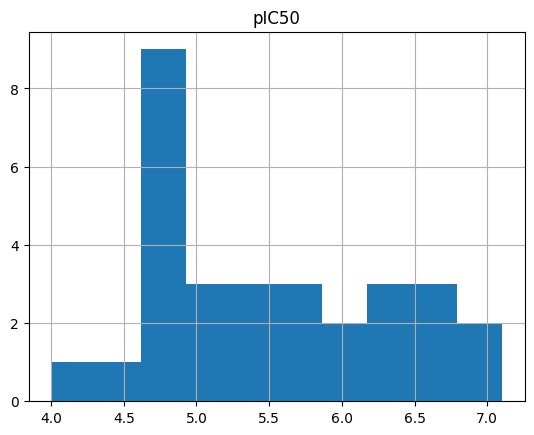

In [55]:
# Draw compound data
output_df.hist(column="pIC50")

In the next steps, we add a column for RDKit molecule objects to our DataFrame and look at the structures of the molecules with the highest pIC50 values.

In [56]:
# Add molecule column
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol="smiles")

In [57]:
# Sort molecules by pIC50
output_df.sort_values(by="pIC50", ascending=False, inplace=True)

# Reset index
output_df.reset_index(drop=True, inplace=True)

In [58]:
# Show the three most active molecules, i.e. molecules with the highest pIC50 values.
output_df.drop("smiles", axis=1).head(3)

,molecule_chembl_id,IC50,units,pIC50,ROMol
0,CHEMBL4175831,79.0,nM,7.102373,<rdkit.Chem.rdchem.Mol object at 0x7a68af223290>
1,CHEMBL4176189,140.0,nM,6.853872,<rdkit.Chem.rdchem.Mol object at 0x7a68af220190>
2,CHEMBL471547,230.0,nM,6.638272,<rdkit.Chem.rdchem.Mol object at 0x7a68af223220>


In [59]:
# Prepare saving the dataset: Drop the ROMol column
output_df = output_df.drop("ROMol", axis=1)
print(f"DataFrame shape: {output_df.shape}")

DataFrame shape: (30, 5)


In [60]:
output_df.to_csv("O31048_uniprot_porphyromonas_gingivalis.csv", index=False)